In [12]:
# %matplotlib notebook

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
t = 100
filename=r"..\..\..\Data\A304\A304_MR_center_contact\A304_SRO_NGO_100K.csv"
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value','multiplier'])
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

In [15]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df['B'] = df['B_int']
df = df[["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value', 'multiplier']].copy()
df.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,Rel_value,multiplier
0,0.001,10000,100.091283,4018.077995,-4017.306390,4032.804460,-4032.207163,4014.062022,-4013.759069,4030.813771,-4030.477596,-0.000003,1000000.0
1,0.001,9000,100.002108,4016.576466,-4016.518695,4031.530917,-4031.447888,4014.683756,-4014.667051,4030.879924,-4030.770366,-0.000003,1000000.0
2,0.001,8000,99.999489,4017.601910,-4017.604594,4032.645857,-4032.599152,4015.877160,-4015.885553,4032.012947,-4031.989444,-0.000003,1000000.0
3,0.001,7000,99.999846,4018.949886,-4018.867413,4033.785255,-4033.849078,4017.116448,-4017.148525,4033.348096,-4033.170705,-0.000003,1000000.0
4,0.001,6000,100.000171,4020.118897,-4020.157016,4035.096818,-4035.084229,4018.415201,-4018.388568,4034.558634,-4034.448062,-0.000003,1000000.0


In [16]:
df['R1'] = df['V1']/(df['multiplier']*df['I'])
df['R2'] = df['V2']/(df['multiplier']*df['I'])
df['R3'] = df['V3']/(df['multiplier']*df['I'])
df['R4'] = df['V4']/(df['multiplier']*df['I'])
df['R5'] = df['V5']/(df['multiplier']*df['I'])
df['R6'] = df['V6']/(df['multiplier']*df['I'])
df['R7'] = df['V7']/(df['multiplier']*df['I'])
df['R8'] = df['V8']/(df['multiplier']*df['I'])

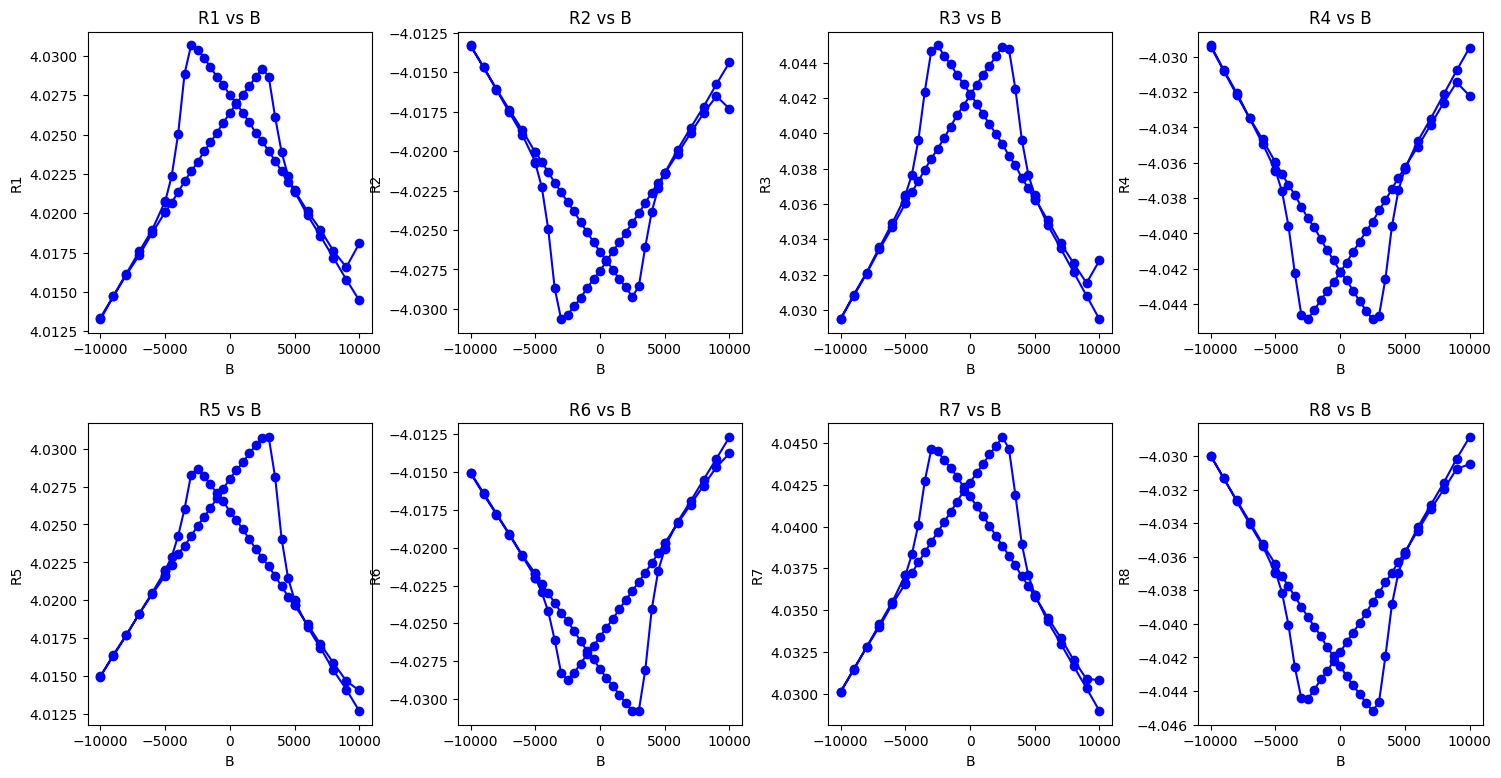

In [17]:
plt.figure(figsize=(18,9))
plt.subplot(2,4,1)
plt.plot(df['B'],df['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')

plt.subplot(2,4,2)
plt.plot(df['B'],df['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')

plt.subplot(2,4,3)
plt.plot(df['B'],df['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,4,4)
plt.plot(df['B'],df['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplot(2,4,5)
plt.plot(df['B'],df['R5'], 'bo-')
plt.title('R5 vs B')
plt.ylabel('R5')
plt.xlabel('B')
plt.subplot(2,4,6)
plt.plot(df['B'],df['R6'], 'bo-')
plt.title('R6 vs B')
plt.ylabel('R6')
plt.xlabel('B')
plt.subplot(2,4,7)
plt.plot(df['B'],df['R7'], 'bo-')
plt.title('R7 vs B')
plt.ylabel('R7')
plt.xlabel('B')
plt.subplot(2,4,8)
plt.plot(df['B'],df['R8'], 'bo-')
plt.title('R8 vs B')
plt.ylabel('R8')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## MR Calculation without Field correction

### Ra -> Average Resistance of Two opposite sides

### Rb -> Average Resistance of Other two opposite sides

### R -> Average Resistance

In [18]:
df['Ra'] = (df['R1'] + df['R5'] - df['R2'] - df['R6'])/4
df['Rb'] = (df['R3'] + df['R7'] - df['R4'] - df['R8'])/4
df['R'] = (df['Ra'] + df['Rb'])/2

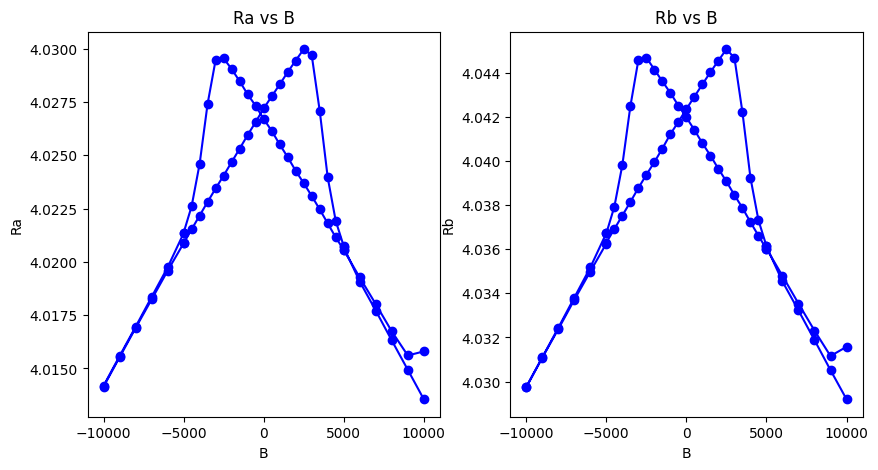

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df['B'], df['Ra'],'bo-')
plt.title('Ra vs B')
plt.ylabel('Ra')
plt.xlabel('B')

plt.subplot(1,2,2)
plt.plot(df['B'], df['Rb'],'bo-')
plt.title('Rb vs B')
plt.ylabel('Rb')
plt.xlabel('B')

plt.show()

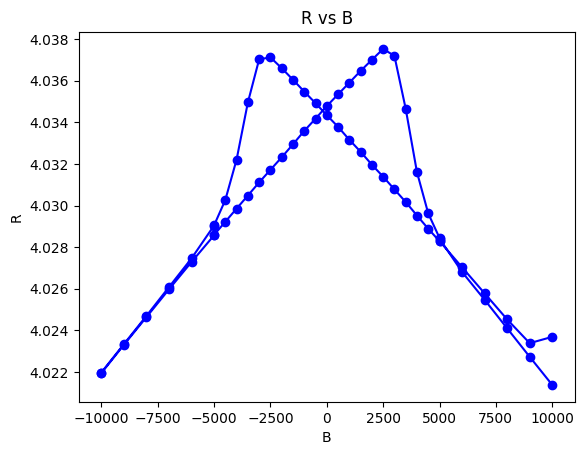

In [20]:
plt.plot(df['B'], df['R'],'bo-')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Comparing MR of Ra, Rb, R

In [21]:
Ra0 = df.loc[df['B'] == 0]['Ra'].mean()
Rb0 = df.loc[df['B'] == 0]['Rb'].mean()
R0 = df.loc[df['B'] == 0]['R'].mean()

df['MRa'] = ((df['Ra'] - Ra0)*100)/Ra0
df['MRb'] = ((df['Rb'] - Rb0)*100)/Rb0
df['MR'] = ((df['R'] - R0)*100)/R0

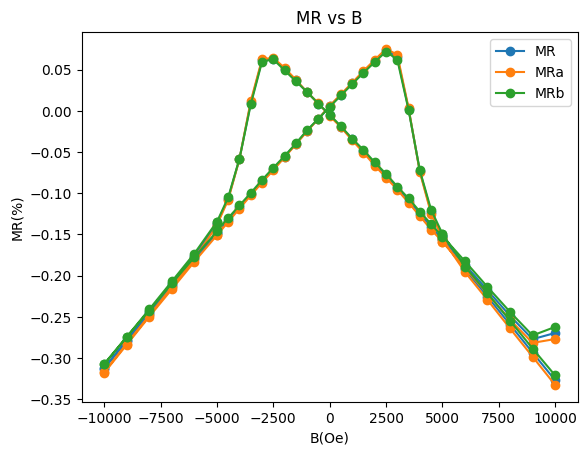

(None, 100, 10, 200)

In [22]:
plt.plot(df['B'], df['MR'], 'o-', label = "MR")
plt.plot(df['B'], df['MRa'], 'o-', label = "MRa")
plt.plot(df['B'], df['MRb'], 'o-', label = "MRb")
plt.title('MR vs B')
plt.ylabel('MR(%)')
plt.xlabel('B(Oe)')
plt.legend()
plt.show(), 100, 10, 200

# MR calculation with Field Correction

Averageing the current Reverse part

In [23]:
df['V1'] = (df['V1'] - df['V2'])/2
df['V2'] = (df['V3'] - df['V4'])/2
df['V3'] = (df['V5'] - df['V6'])/2
df['V4'] = (df['V7'] - df['V8'])/2

In [24]:
df = df[['I','B','V1','V2','V3','V4',"multiplier"]].copy()
df.head()

,I,B,V1,V2,V3,V4,multiplier
0,0.001,10000,4017.692192,4032.505811,4013.910546,4030.645683,1000000.0
1,0.001,9000,4016.547581,4031.489403,4014.675403,4030.825145,1000000.0
2,0.001,8000,4017.603252,4032.622504,4015.881357,4032.001196,1000000.0
3,0.001,7000,4018.908649,4033.817166,4017.132486,4033.259400,1000000.0
4,0.001,6000,4020.137956,4035.090524,4018.401885,4034.503348,1000000.0


In [25]:
min_B = df['B'].min()
max_B = df['B'].max()
print(min_B, max_B)

-10000 10000


In [26]:
B_min_idx = 0
for i in range(len(df)):
    if(df['B'].iloc[i]== min_B): 
        B_min_idx = i
        break

### Creating dec Field dataset

In [27]:
df_dec = df.iloc[ : B_min_idx+1].copy()
df_inc = df.iloc[B_min_idx+1 : ].copy()

data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1)
data_dec = data_dec[data_dec['B_x'] == -1*data_dec['B_y']] # selecting 
data_dec = data_dec[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns
data_dec.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [28]:
data_dec['V15'] = (data_dec['V1'] + data_dec['V5'])/2
data_dec['V26'] = (data_dec['V2'] + data_dec['V6'])/2
data_dec['V37'] = (data_dec['V3'] + data_dec['V7'])/2
data_dec['V48'] = (data_dec['V4'] + data_dec['V8'])/2

In [29]:
data_dec.head()

,I,B,V1,V2,V3,V4,V5,V6,V7,V8,multiplier,V15,V26,V37,V48
0,0.001,10000,4017.692192,4032.505811,4013.910546,4030.645683,4013.279795,4029.425998,4015.019320,4030.047093,1000000.0,4015.485993,4030.965904,4014.464933,4030.346388
34,0.001,9000,4016.547581,4031.489403,4014.675403,4030.825145,4014.690332,4030.766926,4016.359002,4031.397826,1000000.0,4015.618956,4031.128164,4015.517203,4031.111486
68,0.001,8000,4017.603252,4032.622504,4015.881357,4032.001196,4016.073240,4032.052622,4017.720926,4032.699676,1000000.0,4016.838246,4032.337563,4016.801141,4032.350436
102,0.001,7000,4018.908649,4033.817166,4017.132486,4033.259400,4017.363202,4033.452190,4019.110614,4033.964178,1000000.0,4018.135926,4033.634678,4018.121550,4033.611789
136,0.001,6000,4020.137956,4035.090524,4018.401885,4034.503348,4018.709177,4034.684715,4020.452174,4035.301596,1000000.0,4019.423567,4034.887619,4019.427029,4034.902472


In [30]:
# data_dec['Ra'] = (data_dec['V15'] + data_dec['V37'])/(2*data_dec['I']*data_dec['multiplier'])
# data_dec['Rb'] = (data_dec['V26'] + data_dec['V48'])/(2*data_dec['I']*data_dec['multiplier'])
# data_dec['R'] = (data_dec['Ra'] + data_dec['Rb'])/2

### Creating Increasing Field Dataset

In [31]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1)
data_inc = data_inc[data_inc['B_x'] == -1*data_inc['B_y']] # selecting 
data_inc = data_inc[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns
data_inc.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [32]:
data_inc['V15'] = (data_inc['V1'] + data_inc['V5'])/2
data_inc['V26'] = (data_inc['V2'] + data_inc['V6'])/2
data_inc['V37'] = (data_inc['V3'] + data_inc['V7'])/2
data_inc['V48'] = (data_inc['V4'] + data_inc['V8'])/2

In [33]:
data_inc.head()

,I,B,V1,V2,V3,V4,V5,V6,V7,V8,multiplier,V15,V26,V37,V48
0,0.001,-10000,4013.279795,4029.425998,4015.019320,4030.047093,4017.692192,4032.505811,4013.910546,4030.645683,1000000.0,4015.485993,4030.965904,4014.464933,4030.346388
34,0.001,-9000,4014.690332,4030.766926,4016.359002,4031.397826,4016.547581,4031.489403,4014.675403,4030.825145,1000000.0,4015.618956,4031.128164,4015.517203,4031.111486
68,0.001,-8000,4016.073240,4032.052622,4017.720926,4032.699676,4017.603252,4032.622504,4015.881357,4032.001196,1000000.0,4016.838246,4032.337563,4016.801141,4032.350436
102,0.001,-7000,4017.363202,4033.452190,4019.110614,4033.964178,4018.908649,4033.817166,4017.132486,4033.259400,1000000.0,4018.135926,4033.634678,4018.121550,4033.611789
136,0.001,-6000,4018.709177,4034.684715,4020.452174,4035.301596,4020.137956,4035.090524,4018.401885,4034.503348,1000000.0,4019.423567,4034.887619,4019.427029,4034.902472


### Stacking both the datas

In [34]:
data = pd.concat([data_dec,data_inc])

In [35]:
data['Ra'] = (data['V15'] + data['V37'])/(2*data['I']*data['multiplier'])
data['Rb'] = (data['V26'] + data['V48'])/(2*data['I']*data['multiplier'])
data['R'] = (data['Ra'] + data['Rb'])/2

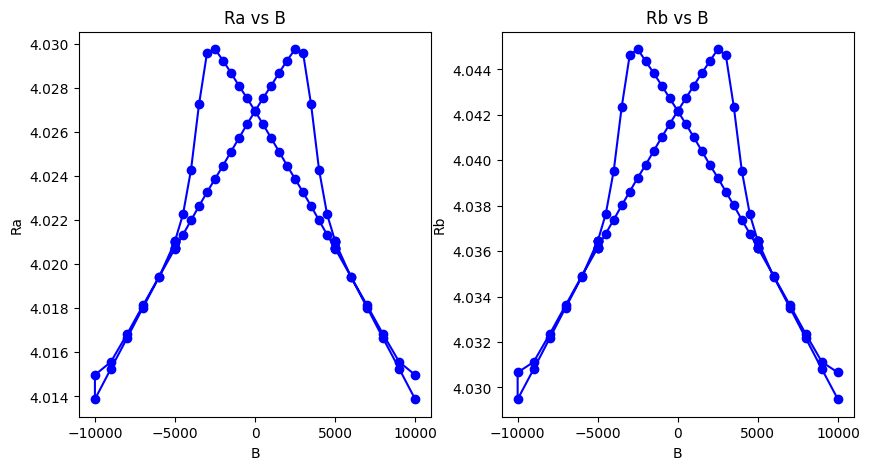

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(data['B'], data['Ra'],'bo-')
plt.title('Ra vs B')
plt.ylabel('Ra')
plt.xlabel('B')

plt.subplot(1,2,2)
plt.plot(data['B'], data['Rb'],'bo-')
plt.title('Rb vs B')
plt.ylabel('Rb')
plt.xlabel('B')

plt.show()

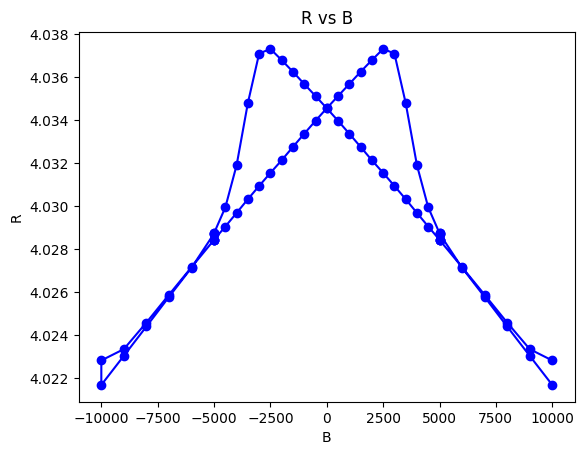

In [37]:
plt.plot(data['B'],data['R'],'bo-')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Comparing MR of Ra, Rb, R

In [38]:
Ra0 = data.loc[data['B'] == 0]['Ra'].mean()
Rb0 = data.loc[data['B'] == 0]['Rb'].mean()
R0 = data.loc[data['B'] == 0]['R'].mean()

data['MRa'] = ((data['Ra'] - Ra0)*100)/Ra0
data['MRb'] = ((data['Rb'] - Rb0)*100)/Rb0
data['MR'] = ((data['R'] - R0)*100)/R0

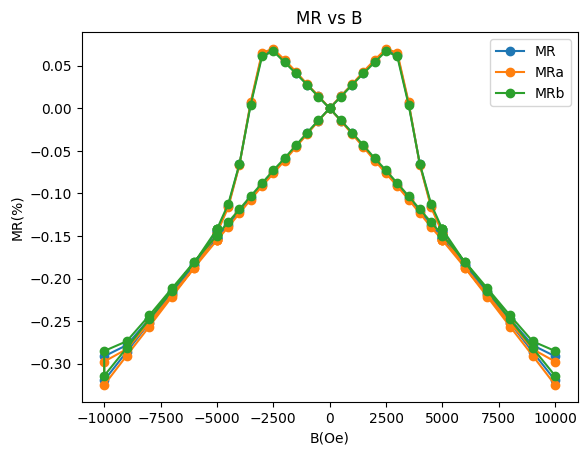

In [39]:
plt.plot(data['B'], data['MR'], 'o-', label = "MR")
plt.plot(data['B'], data['MRa'], 'o-', label = "MRa")
plt.plot(data['B'], data['MRb'], 'o-', label = "MRb")
plt.title('MR vs B')
plt.ylabel('MR(%)')
plt.xlabel('B(Oe)')
plt.legend()
plt.show()

In [40]:
data.to_pickle(f"./pickle_data/MR_CENTRAL_CONTACT_{t}K.pkl")